In [1]:
keeps = ['name', 'colorIdentity', 'colors', 'type', 'types', 'subtypes', 'supertypes', 'cmc', 'power', 'toughness', 'flavor', 'text', 'legalities']
colorIdentity_map = {'B': 'Black', 'G': 'Green', 'R': 'Red', 'U': 'Blue', 'W': 'White'}
plt_colors = ['k', 'b', '0.5', 'g', 'r', 'w', 'm']

In [2]:
import plotly

In [3]:
import pandas as pd
import numpy as np
from numpy.random import random
from math import ceil

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem.porter import PorterStemmer
from nltk import RegexpTokenizer
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
raw = pd.read_json('../MagicDatasets/AllSets-x.json')
raw

,10E,2ED,3ED,4ED,5DN,5ED,6ED,7ED,8ED,9ED,...,pPOD,pPRE,pPRO,pREL,pSUM,pSUS,pWCQ,pWOR,pWOS,pWPN
block,NaN,NaN,NaN,NaN,Mirrodin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booster,"[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...","[rare, uncommon, uncommon, uncommon, common, c...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
border,black,white,white,white,black,white,white,white,white,white,...,black,black,black,black,black,black,black,black,black,black
cards,"[{u'originalType': u'Creature — Human Cleric',...","[{u'originalType': u'Summon — Elemental', u'to...","[{u'originalType': u'Summon — Elemental', u'to...","[{u'originalType': u'Summon — Abomination', u'...","[{u'originalType': u'Instant', u'mciNumber': u...","[{u'originalType': u'Summon — Gargoyles', u'to...","[{u'originalType': u'Enchant Creature', u'text...","[{u'originalType': u'Creature — Spirit', u'tou...","[{u'originalType': u'Creature — Angel', u'toug...","[{u'originalType': u'Creature — Angel', u'toug...",...,"[{u'toughness': u'2', u'text': u'Flying', u'nu...","[{u'toughness': u'4', u'text': u'Whenever an o...","[{u'toughness': u'5', u'text': u'Flying {3}{W}...","[{u'toughness': u'3', u'text': u'When Rukh Egg...","[{u'layout': u'normal', u'name': u'Faerie Conc...","[{u'mciNumber': u'1', u'layout': u'normal', u'...","[{u'toughness': u'3', u'text': u'Haste Wheneve...","[{u'toughness': u'5', u'text': u'When Balduvia...","[{u'toughness': u'4', u'text': u'Flying (This ...","[{u'toughness': u'3', u'text': u'When Sproutin..."
code,10E,2ED,3ED,4ED,5DN,5ED,6ED,7ED,8ED,9ED,...,pPOD,pPRE,pPRO,pREL,pSUM,pSUS,pWCQ,pWOR,pWOS,pWPN
gathererCode,NaN,2U,3E,4E,NaN,5E,6E,7E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
magicCardsInfoCode,10e,un,rv,4e,5dn,5e,6e,7e,8e,9e,...,pot,ptc,pro,rep,sum,sus,wmcq,wrl,wotc,grc
magicRaritiesCodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,[82-rarities-prerelease-events-promos],[14-rarities-pro-tour-card],[94-rarities-release-events-promos],[118-rarities-summer-of-magic-tournament],[36-rarities-junior-super-series],[780-rarities-world-magic-cup-qualifiers-promos],[15-rarities-worlds-card],[51-rarities-wizards-of-the-coast-online-store],[255-rarities-wpn-promos]
mkm_id,74,3,6,10,47,23,29,37,44,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mkm_name,Tenth Edition,Unlimited,Revised,Fourth Edition,Fifth Dawn,Fifth Edition,Sixth Edition,Seventh Edition,Eighth Edition,Ninth Edition,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
mtg = []
for col in raw.columns.values:
    release = pd.DataFrame(raw[col]['cards'])
    release = release.loc[:, keeps]
    release['releaseName'] = raw[col]['name']
    release['releaseDate'] = raw[col]['releaseDate']
    mtg.append(release)
mtg = pd.concat(mtg)
del release, raw   
mtg

,name,colorIdentity,colors,type,types,subtypes,supertypes,cmc,power,toughness,flavor,text,legalities,releaseName,releaseDate
0,Ancestor's Chosen,[W],[White],Creature — Human Cleric,[Creature],"[Human, Cleric]",NaN,7.0,4,4,"""The will of all, by my hand done.""",First strike (This creature deals combat damag...,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
1,Angel of Mercy,[W],[White],Creature — Angel,[Creature],[Angel],NaN,5.0,3,3,Every tear shed is a drop of immortality.,Flying\nWhen Angel of Mercy enters the battlef...,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
2,Angelic Blessing,[W],[White],Sorcery,[Sorcery],NaN,NaN,3.0,NaN,NaN,Only the warrior who can admit mortal weakness...,Target creature gets +3/+3 and gains flying un...,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
3,Angelic Chorus,[W],[White],Enchantment,[Enchantment],NaN,NaN,5.0,NaN,NaN,The harmony of the glorious is a dirge to the ...,Whenever a creature enters the battlefield und...,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
4,Angelic Wall,[W],[White],Creature — Wall,[Creature],[Wall],NaN,2.0,0,4,"""The Ancestor protects us in ways we can't beg...",Defender (This creature can't attack.)\nFlying,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
5,Aura of Silence,[W],[White],Enchantment,[Enchantment],NaN,NaN,3.0,NaN,NaN,Not all silences are easily broken.,Artifact and enchantment spells your opponents...,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
6,Aven Cloudchaser,[W],[White],Creature — Bird Soldier,[Creature],"[Bird, Soldier]",NaN,4.0,2,2,"""At the Reapportionment, Eagle begged to be hu...",Flying (This creature can't be blocked except ...,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
7,Ballista Squad,[W],[White],Creature — Human Rebel,[Creature],"[Human, Rebel]",NaN,4.0,2,2,The perfect antidote for a tightly packed form...,"{X}{W}, {T}: Ballista Squad deals X damage to ...","[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
8,Bandage,[W],[White],Instant,[Instant],NaN,NaN,1.0,NaN,NaN,"Life is measured in inches. To a healer, every...",Prevent the next 1 damage that would be dealt ...,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13
9,Beacon of Immortality,[W],[White],Instant,[Instant],NaN,NaN,6.0,NaN,NaN,The cave floods with light. A thousand rays sh...,Double target player's life total. Shuffle Bea...,"[{u'legality': u'Legal', u'format': u'Commande...",Tenth Edition,2007-07-13


In [19]:
mtg_cards = pd.read_csv("../MagicDatasets/Magic_Pandas_DF")
mtg = mtg_cards


In [20]:
# remove tokens without types
mtg = mtg.loc[~mtg.types.apply(lambda x: isinstance(x, float))]

# Power and toughness that depends on board state or mana cannot be resolved
mtg[['power', 'toughness']] = mtg[['power', 'toughness']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Fill
mtg.flavor.fillna('', inplace=True)
mtg.text.fillna('', inplace=True)
mtg.shape

/Users/KVASU/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/KVASU/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



(31699, 40)

In [21]:
# Combine colorIdentity and colors
mtg.loc[(mtg.colors.isnull()) & (mtg.colorIdentity.notnull()), 'colors'] = mtg.loc[(mtg.colors.isnull()) & (mtg.colorIdentity.notnull()), 'colorIdentity'].apply(lambda x: [colorIdentity_map[i] for i in x])
mtg['colorsCount'] = 0
mtg.loc[mtg.colors.notnull(), 'colorsCount'] = mtg.colors[mtg.colors.notnull()].apply(len)
mtg.loc[mtg.colors.isnull(), 'colors'] = ['Colorless']
mtg['colorsStr'] = mtg.colors.apply(lambda x: ''.join(x))

# Include colorless and multi-color.
mtg['manaColors'] = mtg['colorsStr']
mtg.loc[mtg.colorsCount>1, 'manaColors'] = 'Multi'

# Materialize color columns
mono_colors = np.sort(mtg.colorsStr[mtg.colorsCount<=1].unique()).tolist()

for color in mono_colors:
    mtg[color] = mtg.colors.apply(lambda x: color in x)

KeyError: '['

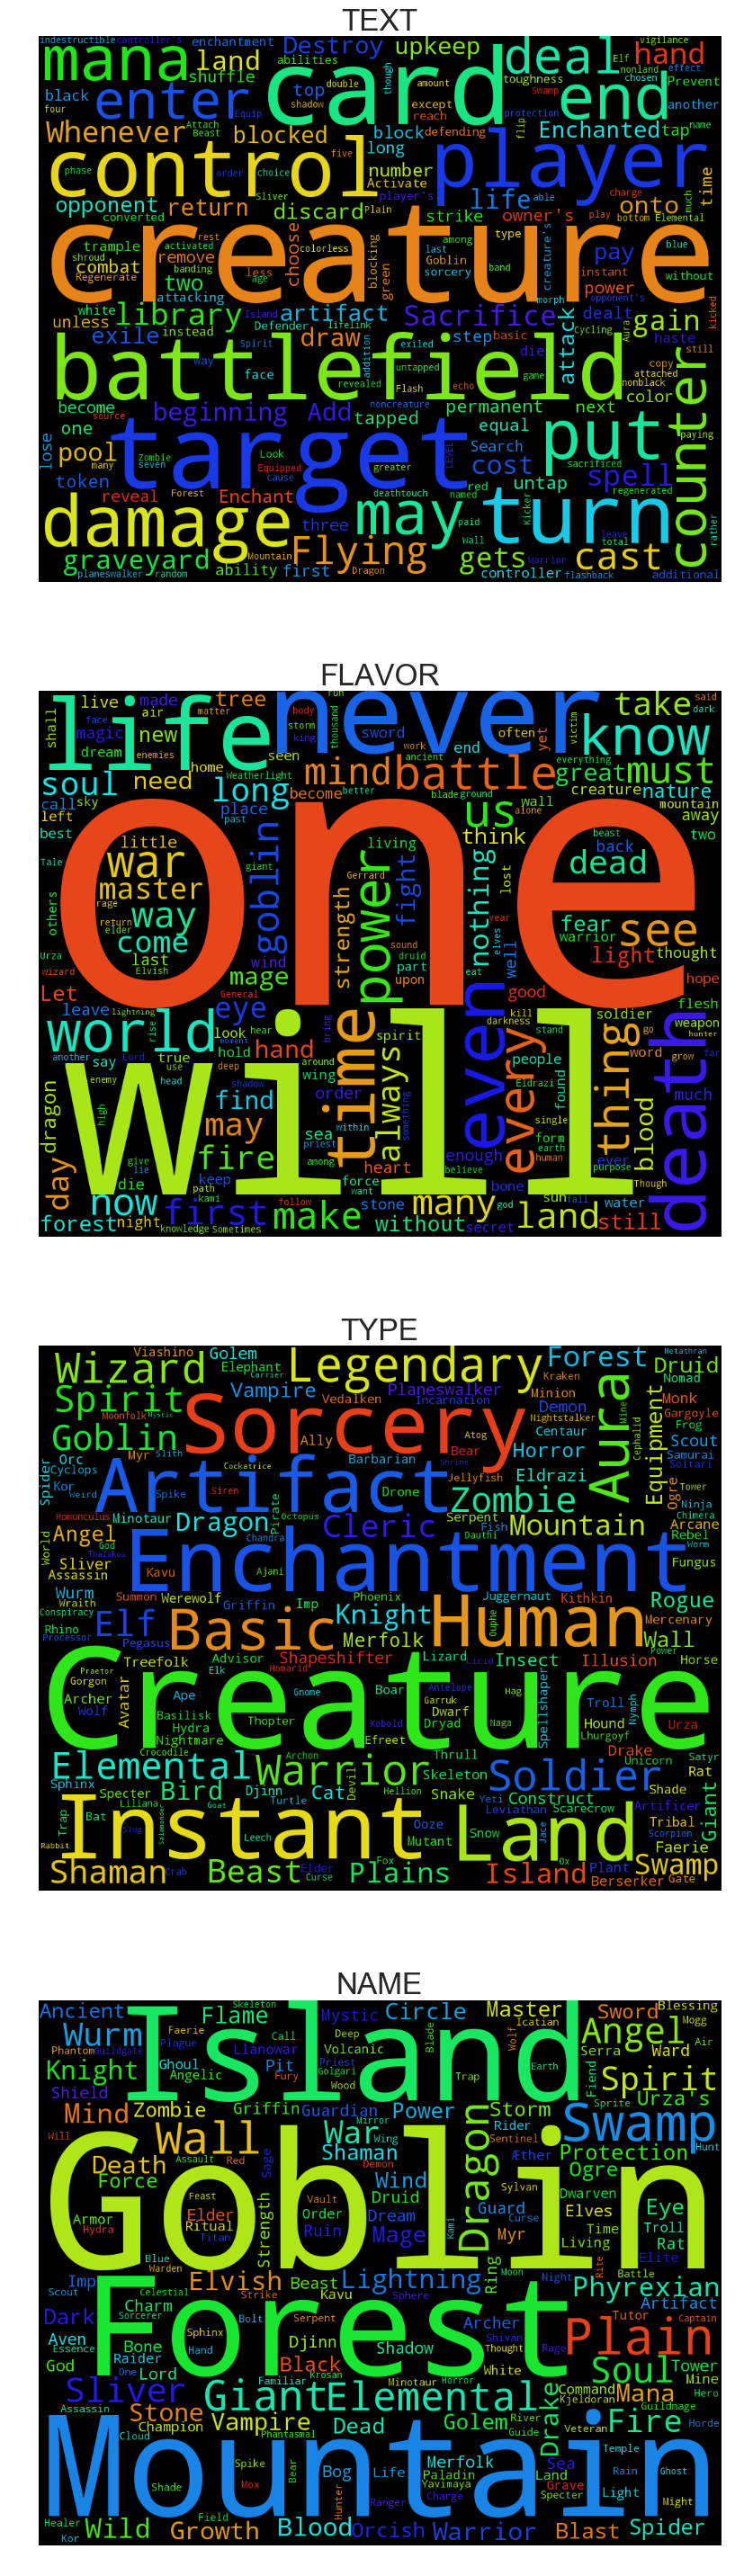

In [10]:
wc = WordCloud(width=1000, height=800, max_words=200, relative_scaling=0.5)
cols = ['text', 'flavor', 'type', 'name']
f, axs = plt.subplots(len(cols), figsize=(80, 36))

for i, col in enumerate(cols):
    text = mtg[col].str.cat(sep=' ')    
    wc.generate(text)
    axs[i].imshow(wc)
    axs[i].axis("off")    
    axs[i].set_title(col.upper(), fontsize=24)

del wc, cols, f, axs

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Bar(
        x=['Bob Dylan', 'The Beatles', 'David Bowie', 'Randy Newman', 'The Rolling Stones', 'Madonna', 'Frank Sinatra', 'The Beach Boys', 'Marvin Gaye', 'Prince', 'The Kinks', 'Elvis Presley', 'Tom Waits', 'U2', 'The Clash', 'Johnny Cash', 'Kate Bush', 'The Supremes', 'The Smiths', 'Al Green', 'Pulp', 'Chuck Berry', 'Elvis Costello and the Attractions', 'Neil Young', 'Stevie Wonder', 'Ray Charles', 'The Pogues', 'Grace Jones', 'Bill Withers', 'The Who', 'Paul Simon', 'Roy Orbison', 'Arctic Monkeys', 'Bruce Springsteen', 'The Police', 'Rod Stewart', 'Steve Earle'],
        y=[24, 19, 9, 8, 8, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        name = 'Number of songs per artist',
        marker = Marker(color='#2ca02c')
    )
]

layout = go.Layout(
    title="Number of songs listed in the Guardian's<br><em>Top 1,000 Songs to Hear Before You Die</em> per artist with 4 or more songs",
    font=dict(
        family='Georgia, serif',
        color='#635F5D'
    ),
    plot_bgcolor='#EFECEA'
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig)

NameError: name 'Marker' is not defined